# Capstone Three: Data Wrangling and EDA

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

The data of molecules and their properties were obtained from QM9 dataset. <br>
http://quantum-machine.org/datasets/ <br>
https://figshare.com/collections/Quantum_chemistry_structures_and_properties_of_134_kilo_molecules/978904 <br>

References: <br>
L. Ruddigkeit, R. van Deursen, L. C. Blum, J.-L. Reymond, Enumeration of 166 billion organic small molecules in the chemical universe database GDB-17, J. Chem. Inf. Model. 52, 2864–2875, 2012. <br>
R. Ramakrishnan, P. O. Dral, M. Rupp, O. A. von Lilienfeld, Quantum chemistry structures and properties of 134 kilo molecules, Scientific Data 1, 140022, 2014. <br>

Note that the raw data were supplied separately for each molecule. Thus, a python script was used to extract data. For instance, the following code was in run.py and output to data.out.

for i in range(1,133885 + 1):

    f = open('dsgdb9nsd_%s.xyz' % str(i).zfill(6))
    lines = f.readlines()
    allstr = lines[1].strip() + ' ' + lines[-2].strip()
    print(allstr)
    f.close()

In [2]:
df = pd.read_csv('../data/data.out',header=None,delim_whitespace=True)

In [3]:
df = df.rename(columns={0: "tag", 1: "index", 2:"A", 3:"B", 4:"C", 5:"mu"
                  , 6:"alpha", 7:"homo", 8:"lumo", 9:"gap", 10:"r2"
                  , 11:"zpve", 12:"U0", 13:"U", 14:"H", 15:"G"
                  , 16:"Cv",17:"SMILES_GDB9",18:"SMILES_relaxed"})

In [4]:
df = df.set_index('index')

In [5]:
df.head()

,tag,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv,SMILES_GDB9,SMILES_relaxed
index,,,,,,,,,,,,,,,,,,
1,gdb,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,C,C
2,gdb,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,N,N
3,gdb,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,O,O
4,gdb,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,C#C,C#C
5,gdb,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,C#N,C#N


### The description of columns according to their README:

 1  tag       -            "gdb9"; string constant to ease extraction via grep <br>
 2  index     -            Consecutive, 1-based integer identifier of molecule <br>
 3  A         GHz          Rotational constant A <br>
 4  B         GHz          Rotational constant B <br>
 5  C         GHz          Rotational constant C <br>
 6  mu        Debye        Dipole moment <br>
 7  alpha     Bohr^3       Isotropic polarizability <br>
 8  homo      Hartree      Energy of Highest occupied molecular orbital (HOMO) <br>
 9  lumo      Hartree      Energy of Lowest occupied molecular orbital (LUMO) <br>
10  gap       Hartree      Gap, difference between LUMO and HOMO <br>
11  r2        Bohr^2       Electronic spatial extent <br>
12  zpve      Hartree      Zero point vibrational energy <br>
13  U0        Hartree      Internal energy at 0 K <br>
14  U         Hartree      Internal energy at 298.15 K <br>
15  H         Hartree      Enthalpy at 298.15 K <br>
16  G         Hartree      Free energy at 298.15 K <br>
17  Cv        cal/(mol K)  Heat capacity at 298.15 K <br>

## Data Wrangling and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133885 entries, 1 to 133885
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tag             133885 non-null  object 
 1   A               133885 non-null  float64
 2   B               133885 non-null  float64
 3   C               133885 non-null  float64
 4   mu              133885 non-null  float64
 5   alpha           133885 non-null  float64
 6   homo            133885 non-null  float64
 7   lumo            133885 non-null  float64
 8   gap             133885 non-null  float64
 9   r2              133885 non-null  float64
 10  zpve            133885 non-null  float64
 11  U0              133885 non-null  float64
 12  U               133885 non-null  float64
 13  H               133885 non-null  float64
 14  G               133885 non-null  float64
 15  Cv              133885 non-null  float64
 16  SMILES_GDB9     133885 non-null  object 
 17  SMILES_rel

Note: Data types appear to be correct.

In [7]:
df.isnull().sum()

tag               0
A                 0
B                 0
C                 0
mu                0
alpha             0
homo              0
lumo              0
gap               0
r2                0
zpve              0
U0                0
U                 0
H                 0
G                 0
Cv                0
SMILES_GDB9       0
SMILES_relaxed    0
dtype: int64

Note: It appears that there is no missing value.

In [8]:
df.describe()

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
count,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000
mean,9.814382,1.406097,1.124921,2.706037,75.191296,-0.239977,0.011124,0.251100,1189.527450,0.148524,-411.543985,-411.535513,-411.534569,-411.577397,31.600676
std,1809.465666,1.583795,1.095618,1.530394,8.187793,0.022131,0.046936,0.047519,279.757172,0.033274,40.060230,40.060012,40.060012,40.060741,4.062471
min,0.000000,0.337120,0.331180,0.000000,6.310000,-0.428600,-0.175000,0.024600,19.000200,0.015951,-714.568061,-714.560153,-714.559209,-714.602138,6.002000
25%,2.554430,1.091630,0.910480,1.588700,70.380000,-0.252500,-0.023800,0.216300,1018.322600,0.125289,-437.913936,-437.905942,-437.904997,-437.947682,28.942000
50%,3.090360,1.369940,1.078560,2.500000,75.500000,-0.241000,0.012000,0.249400,1147.585800,0.148329,-417.864758,-417.857351,-417.856407,-417.895731,31.555000
75%,3.835820,1.653980,1.279540,3.636100,80.520000,-0.228700,0.049200,0.288200,1308.816600,0.171150,-387.049166,-387.039746,-387.038802,-387.083279,34.276000
max,619867.683140,437.903860,282.945450,29.556400,196.620000,-0.101700,0.193500,0.622100,3374.753200,0.273944,-40.478930,-40.476062,-40.475117,-40.498597,46.969000


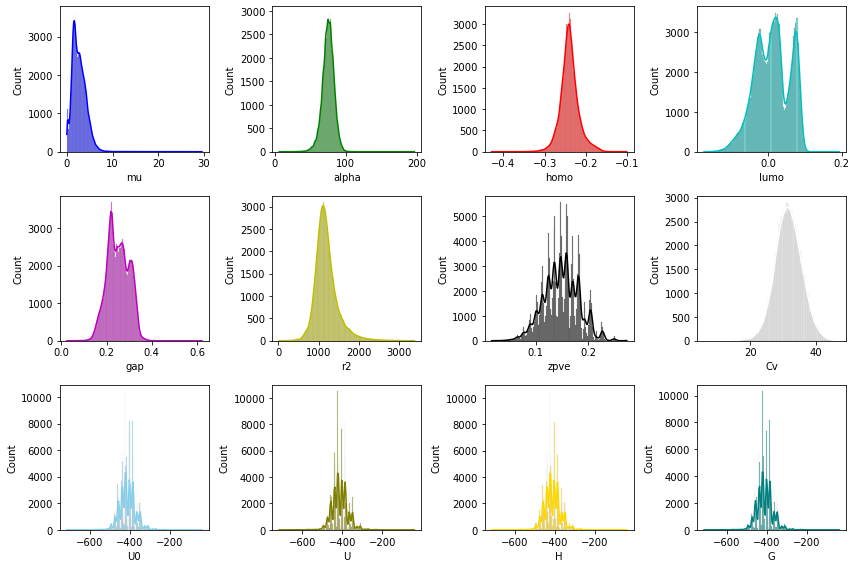

In [9]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

sns.histplot(data=df, x="mu", kde=True, color="b", ax=axs[0, 0])
sns.histplot(data=df, x="alpha", kde=True, color="g", ax=axs[0, 1])
sns.histplot(data=df, x="homo", kde=True, color="r", ax=axs[0, 2])
sns.histplot(data=df, x="lumo", kde=True, color="c", ax=axs[0, 3])

sns.histplot(data=df, x="gap", kde=True, color="m", ax=axs[1, 0])
sns.histplot(data=df, x="r2", kde=True, color="y", ax=axs[1, 1])
sns.histplot(data=df, x="zpve", kde=True, color="k", ax=axs[1, 2])
sns.histplot(data=df, x="Cv", kde=True, color="w", ax=axs[1, 3])

sns.histplot(data=df, x="U0", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="U", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="H", kde=True, color="gold", ax=axs[2, 2])
sns.histplot(data=df, x="G", kde=True, color="teal", ax=axs[2, 3])

plt.tight_layout()
plt.show()

Note: Most of these variables contain extreme values. The ranges of these variables also vary significantly, proper normalization or transformation will be required.

## Check chemical distribution of chemical structures

Check the chemical space based on molecular structures, which can be derived from smile strings.

In [10]:
list_smiles = df['SMILES_relaxed']

Convert smile strings to RDKit object

In [11]:
ms = [Chem.MolFromSmiles(x) for x in list_smiles]

RDKit ERROR: [15:15:57] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:15:57] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:15:57] Can't kekulize mol.  U

RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6

RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7
RDKit ERROR: 
[15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7

RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 7
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 7
RDKit ERROR: 
RDKit ERROR: [15:15:59] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6
RDKit ERRO

[15:15:59] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:15:59] Explicit valence for atom # 8 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:15:59] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:15:59] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:15:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:15:59] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:15:59] Explicit valence for atom # 2 N, 4, is greater t

RDKit ERROR: [15:16:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[15:16:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6

RDKit ERROR: 
RDKit ERROR: [15:16:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
[15:16:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6

RDKit ERROR: [15:16:00] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:16:00] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[15:16:00] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:01] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:16:01] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:16:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:16:02] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:16:02] Explicit valence for atom # 3 N, 4, is g

RDKit ERROR: [15:16:03] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:16:03] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:16:03] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:16:03] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:16:04] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:16:04] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:16:04] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:16:04] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:16:04] Explicit valence for atom # 2 N, 4, is greater than permitted
[15:16:04] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:16:04] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:16:04] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:16:04] Explicit valence for a

RDKit ERROR: [15:16:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:08] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:16:08] Explicit valence for a

[15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:16:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:16:09] Explicit valence for atom # 3 N, 4,

[15:16:11] Can't kekulize mol.  Unkekulized atoms: 1 2 7

[15:16:11] Can't kekulize mol.  Unkekulized atoms: 1 2 7

[15:16:11] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7

[15:16:11] Explicit valence for atom # 8 N, 4, is greater than permitted
[15:16:11] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7

RDKit ERROR: 
[15:16:11] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7

RDKit ERROR: [15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7

RDKit ERROR: 
RDKit ERROR: [15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7
[15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8

[15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7

RDKit ERROR: 
RDKit ERROR: [15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7
RDKit ERROR: 
RDKit ERROR: [15:16:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8

[15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7

RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6

RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8

[15:16:12] Can't kekulize mol.  Unke

[15:16:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4

RDKit ERROR: 
RDKit ERROR: [15:16:12] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:16:12] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:16:12] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 7
[15:16:12] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8
RDKit ERROR: 
[15:16:12] Can't kekulize mol.  Unkekulized atoms: 1 2 7

[15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7

RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7
RDKit ERROR: 
RDKit ERROR: [15:16:12] Can't kekulize mol.  Unkek

In [12]:
len(ms)

133885

Convert RDKit objects to Morgan Fingerprints (1024 in length)

In [13]:
fps = [AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ms if x is not None]

In [14]:
len(fps)

133139

RDKit was not able to use some of the smile strings (133885 - 133139 = 746 molecules).

To visualization chemical space, the fingerprints can be converted to numpy array. Then, PCA can be used on the data. 

In [15]:
# Reference: https://iwatobipen.wordpress.com/2019/08/27/visualize-chemical-space-as-a-grid-chemoinformatics-rdkit/
def fp2arr(fp):
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    return arr

In [16]:
X = np.asarray([fp2arr(fp) for fp in fps])

In [17]:
pca = PCA(n_components=2)
out = pca.fit_transform(X)

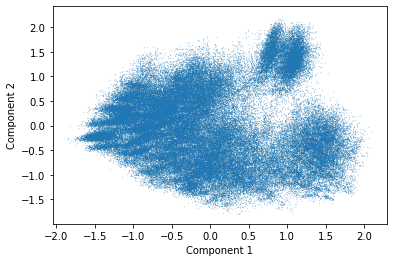

In [18]:
plt.scatter(out[:,0],out[:,1],s=0.01)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Note: From PCA, the 133K molecules appear to be nicely distributed. It can be noticed that there is region near (0.75, 0.25) where additional samples could be useful.

## Check chemical distribution of chemical properties

In [37]:
df_prop = df.drop(columns=['tag','SMILES_GDB9','SMILES_relaxed'])

In [38]:
df_prop

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
index,,,,,,,,,,,,,,,
1,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
2,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316
3,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002
4,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
5,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133881,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658
133882,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697
133883,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972


In [39]:
scaler = MinMaxScaler()

In [40]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_prop), columns=df_prop.columns)

In [41]:
df_scaled.describe()

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
count,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000
mean,0.000016,0.002443,0.002809,0.091555,0.361943,0.577006,0.505085,0.379080,0.348812,0.513864,0.449531,0.449535,0.449535,0.449523,0.624861
std,0.002919,0.003620,0.003877,0.051779,0.043023,0.067701,0.127371,0.079530,0.083366,0.128972,0.059429,0.059429,0.059429,0.059428,0.099164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000004,0.001724,0.002050,0.053751,0.336661,0.538697,0.410312,0.320837,0.297794,0.423802,0.410412,0.410415,0.410415,0.410404,0.559963
50%,0.000005,0.002360,0.002645,0.084584,0.363565,0.573876,0.507463,0.376234,0.336314,0.513107,0.440154,0.440157,0.440157,0.440150,0.623746
75%,0.000006,0.003010,0.003356,0.123022,0.389943,0.611502,0.608412,0.441172,0.384360,0.601563,0.485869,0.485875,0.485875,0.485858,0.690165
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X = df_scaled.to_numpy()

In [43]:
X

array([[2.54428170e-04, 3.59654507e-01, 5.56857267e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.13994190e-02],
       [4.73665200e-04, 6.70078329e-01, 6.76054999e-01, ...,
        9.76194417e-01, 9.76195995e-01, 7.66470574e-03],
       [1.28993355e-03, 1.00000000e+00, 1.00000000e+00, ...,
        9.46704268e-01, 9.46708851e-01, 0.00000000e+00],
       ...,
       [5.92252202e-06, 4.12741608e-03, 5.53344316e-03, ...,
        4.95207553e-01, 4.95204326e-01, 4.38645739e-01],
       [5.69226320e-06, 4.14608752e-03, 5.43015751e-03, ...,
        5.18993377e-01, 5.18989245e-01, 4.58759489e-01],
       [5.87246294e-06, 4.29767582e-03, 5.68531094e-03, ...,
        4.65716763e-01, 4.65714735e-01, 4.25513218e-01]])

In [44]:
pca = PCA(n_components=2)
out = pca.fit_transform(X)

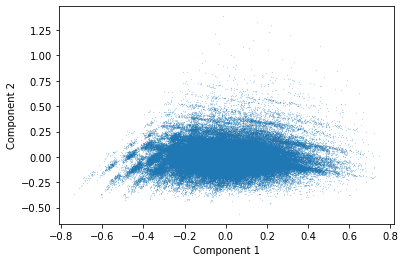

In [45]:
plt.scatter(out[:,0],out[:,1],s=0.01)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Note: From PCA, the properties of these molecules are also distributed nicely. However, there are significant amount of data points that contain extreme values (top region of this plot).